## Imports

In [1]:
%matplotlib inline

import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
plt.style.use('ggplot')

## Functions

In [3]:
def tdm(words_unique, words_questions):
    """Create a term document matrix.
    Return the m (unique words, sorted) by n (words_questions)
    matrix, M.
    """
    M = np.zeros([len(words_unique), len(words_questions)])
    for m, term in enumerate(words_unique):
        for n, doc in enumerate(words_questions):
            M[m, n] = doc.count(term)
    return M

In [4]:
def jitter(values, sd=0.25):
    return [np.random.normal(v, sd) for v in values]

## Data

### Load

In [5]:
df = pd.read_csv('../data/newtrain.csv')

In [6]:
df.head()

,Category,Text
0,5,why are yawns contagious? when people yawn
1,6,what is trans fat? how to reduce that? i heard...
2,1,roth ira vs 401k? what is the difference betwe...
3,1,how many planes fedex has? i heard that it is ...
4,2,what is the best photo slideshow creation appl...


### Label Frequencies

In [7]:
df.Category.value_counts()

1    769
2    454
3    406
4    347
7    246
5    244
6    232
dtype: int64

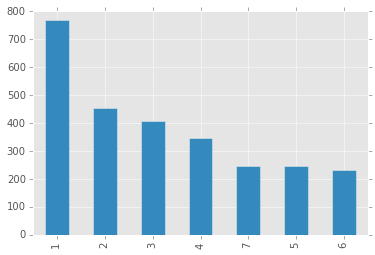

In [8]:
df.Category.value_counts().plot(kind='bar', color='#348ABD')

### Clean

Remove non-alpha numeric characters and extra whitespace.

In [9]:
df['text_clean'] = df['Text'].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x.lower()))\
                             .apply(lambda x: re.sub('\s+', ' ', x).strip())

In [10]:
words_questions = [s.split() for s in df['text_clean'].values]

In [11]:
words_unique = sorted(list(set([word for sent in words_questions for word in sent])))

### NumPy Arrays

In [12]:
X = tdm(words_unique, words_questions)
X = X.T

In [13]:
y = df.Category.values

## k-means

In [14]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=7, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001,
    verbose=0)

In [15]:
df['k_means'] = kmeans.labels_

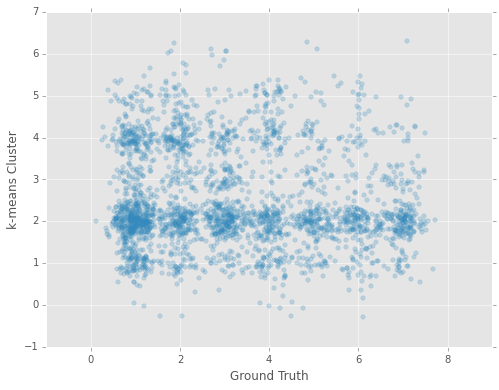

In [16]:
plt.figure(figsize=(8, 6))

plt.scatter(jitter(df.Category),
            jitter(df.k_means),
            color='#348ABD', alpha=0.25)

plt.xlabel('Ground Truth')
plt.ylabel('k-means Cluster')

k-means is classifying most questions into cluster #2.

## Classifiers

Logistic Regression, Random Forest, and naive Bayes.

In [17]:
np.random.seed(123)

lr = LogisticRegression()
rf = RandomForestClassifier()
nb = GaussianNB()

In [18]:
for clf, label in zip([lr, rf, nb], ['Logistic Regression', 'Random Forest', 'naive Bayes']):

    scores = cross_validation.cross_val_score(clf, X, y, cv=7, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.53 (+/- 0.03) [Logistic Regression]
Accuracy: 0.40 (+/- 0.02) [Random Forest]
Accuracy: 0.44 (+/- 0.02) [naive Bayes]
